#  La Régression Linéaire

Le but du TP est de mettre en oeuvre une régression linéaire sur un exemple puis sur des données réelles. Pour cela, vous aurez besoin des formules du cours pour retrouver les coefficients permettant de calculer une régression linéaire. 




## Ex. 1 : La régression simple

1. Soit les couples d’observations suivantes :

x| 18| 7 | 14| 31| 21|  5| 11| 16| 26| 29
-|---|---|---|---|---|---|---|---|---|---
y| 55| 17| 36| 85| 62| 18| 33| 41| 63| 87


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x=np.array([18, 7, 14, 31, 21, 5, 11, 16, 26, 29, 8])
y=np.array([55, 17, 36, 85, 62, 18, 33, 41, 63, 87, 2])

2. Tracer le graphique des couples $x$ et $y$. A partir de ce graphe, peut on soupconner une relation linéaire entre les variables $x$ et $y$ ?

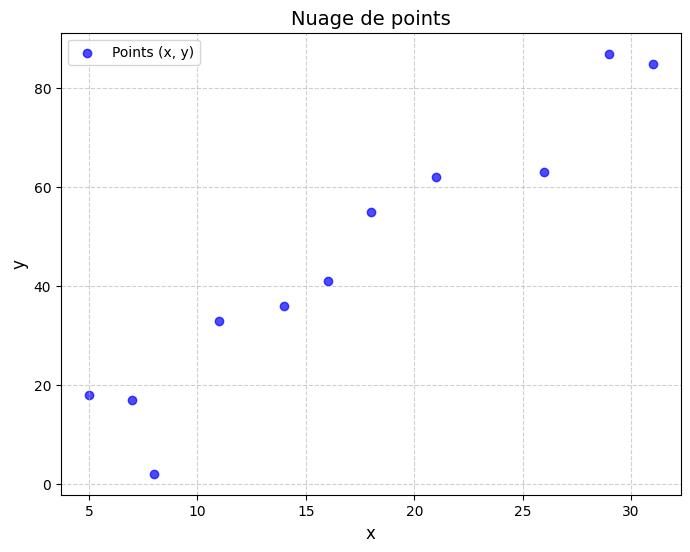

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Points (x, y)', alpha=0.7)
plt.title('Nuage de points', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

On peut soupçonner une relation linéaire entre les variables x et y. Premièrement de manière graphique.En effet, les points semblent alignés selon une tendance générale (montée, une relation linéaire est donc possible.

3. Déterminer pour ces observations la droite de régression au sens des moindres carrés. Pour cela il faudra déterminer les coefficients a et b.

In [3]:
# Calcul des coefficients de la droite de régression
n = len(x)
mean_x = np.mean(x) # Moyenne de x
mean_y = np.mean(y) # Moyenne de y

# Calcul de la pente (a) et de l'ordonnée à l'origine (b)
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x) ** 2)
a = numerator / denominator
b = mean_y - a * mean_x

print(f"Pente (a) : {a}")
print(f"Ordonnée à l'origine (b) : {b}")

Pente (a) : 2.9649359406608227
Ordonnée à l'origine (b) : -4.770734996628455


4. Tracez la droite de régression sur les données.

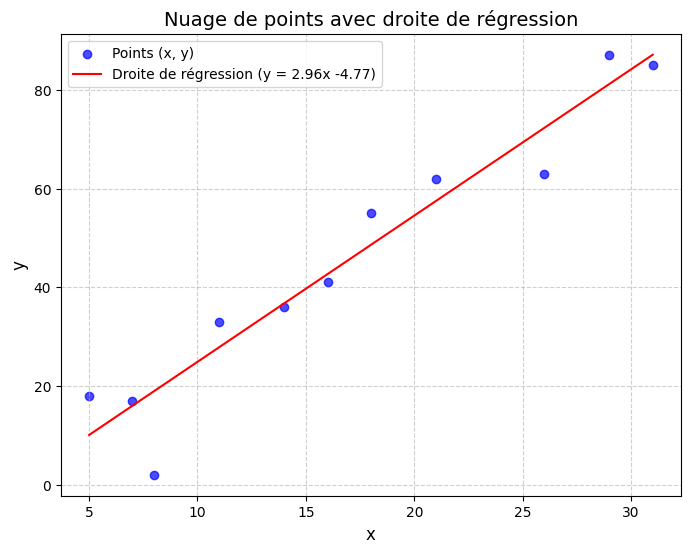

In [12]:
# Création des points pour la droite de régression
x_line = np.linspace(min(x), max(x), 100)
y_line = a * x_line + b

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Points (x, y)', alpha=0.7)
plt.plot(x_line, y_line, color='red', label=f'Droite de régression (y = {a:.2f}x {b:.2f})')
plt.title('Nuage de points avec droite de régression', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

5. Donner une estimation des erreurs $\epsilon_i,i=1,n$

In [6]:
# Calcul des valeurs prédites
y_pred = a * x + b

# Calcul des erreurs (résidus)
errors = y - y_pred

# Affichage des erreurs
for i, error in enumerate(errors, start=1):
    print(f"Erreur pour le point {i} (x={x[i-1]}, y={y[i-1]}): ε = {error:.2f}")


Erreur pour le point 1 (x=18, y=55): ε = 6.40
Erreur pour le point 2 (x=7, y=17): ε = 1.02
Erreur pour le point 3 (x=14, y=36): ε = -0.74
Erreur pour le point 4 (x=31, y=85): ε = -2.14
Erreur pour le point 5 (x=21, y=62): ε = 4.51
Erreur pour le point 6 (x=5, y=18): ε = 7.95
Erreur pour le point 7 (x=11, y=33): ε = 5.16
Erreur pour le point 8 (x=16, y=41): ε = -1.67
Erreur pour le point 9 (x=26, y=63): ε = -9.32
Erreur pour le point 10 (x=29, y=87): ε = 5.79
Erreur pour le point 11 (x=8, y=2): ε = -16.95


6. Calculer la moyenne empirique et la variance empirique des erreurs. Comparez la variance avec l'estimateur non biaisé de la variance donné par $s_y^2 = \frac{1}{n-1}\sum_{i=1}^n (y_i - \overline y)^2$

In [7]:
mean_errors = np.mean(errors)

# Variance empirique des erreurs
var_errors = np.var(errors, ddof=0)  # Variance empirique (ddof=0 pour diviser par n)

# Estimateur non biaisé de la variance de y (s_y^2)
mean_y = np.mean(y)
s_y_squared = np.sum((y - mean_y) ** 2) / (len(y) - 1)

print(f"Moyenne empirique des erreurs: {mean_errors}")
print(f"Variance empirique des erreurs: {var_errors}")
print(f"Estimateur non biaisé de la variance: {s_y_squared}")

Moyenne empirique des erreurs: 0.0
Variance empirique des erreurs: 51.59553730153868
Estimateur non biaisé de la variance: 767.8545454545455


7. Donner une estimation plausible de $y$ lorsque $x = 17$. Quel intervalle de confiance associer à cette prédiction ?

In [ ]:
from scipy.stats import t

# x = 17
x_new = 17

# Prédiction pour x = 17
y_new = a * x_new + b

# Niveau de confiance
confidence = 0.95
n = len(x)
mean_x = np.mean(x)

# Variance empirique des résidus
sigma_squared = np.var(errors, ddof=1)

# Facteur d'élargissement pour l'intervalle de confiance
t_star = t.ppf(1 - (1 - confidence) / 2, df=n - 2)
se = np.sqrt(sigma_squared * (1 + 1 / n + ((x_new - mean_x) ** 2) / np.sum((x - mean_x) ** 2)))

# Calcul des bornes de l'intervalle
lower_bound = y_new - t_star * se
upper_bound = y_new + t_star * se

print(f"Estimation de y pour x = 17 : y = {y_new:.2f}")
print(f"Intervalle de confiance à 95% : I = [{lower_bound:.2f}, {upper_bound:.2f}]")


Estimation de y pour x = 17 : y = 45.63
Intervalle de confiance à 95% : I = [27.83, 63.43]


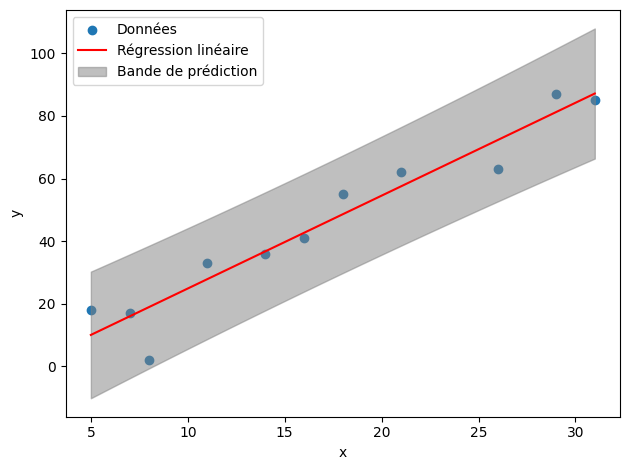

In [55]:
from scipy.optimize import curve_fit

confidence_level = 0.95

def regression_lineaire_prediction_bands(x, y, confidence_level):
    """
    Calcule une régression linéaire et trace les bandes de confiance et de prédiction.

    Args:
        x: Tableau NumPy contenant les valeurs de la variable indépendante.
        y: Tableau NumPy contenant les valeurs de la variable dépendante.
        confidence_level: Niveau de confiance pour les bandes (entre 0 et 1).

    Returns:
        None (affiche le graphique)
    """

    # Fonction de régression linéaire
    def f(x, a, b):
        return a * x + b

    # Ajustement de la courbe
    popt, pcov = curve_fit(f, x, y)
    a, b = popt

    # Calcul des prédictions sur une grille de points
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    y_fit = f(x_fit, a, b)

    # Calcul des bandes de confiance et de prédiction
    n = len(x)
    df = n - 2
    t_value = t.ppf(1 - (1 - confidence_level) / 2, df)
    std_err = np.sqrt(np.sum((y - f(x, a, b))**2) / (n-2))
    std_pred = std_err * np.sqrt(1 + 1/n + (x_fit - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    y_upper = y_fit + t_value * std_pred
    y_lower = y_fit - t_value * std_pred

    # Affichage du graphique
    plt.scatter(x, y, label='Données')
    plt.plot(x_fit, y_fit, color='red', label='Régression linéaire')
    plt.fill_between(x_fit, y_lower, y_upper, alpha=0.5, color='gray', label='Bande de prédiction')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

regression_lineaire_prediction_bands(x, y, confidence_level)

8. a) Donner une estimation plausible de y lorsque x = 48. Quel intervalle de confiance associer à cette prédiction ?

In [54]:
# x = 48
x_new_2 = 48

# Prédiction pour x = 17
y_new = a * x_new_2 + b

# Niveau de confiance
confidence_2 = 0.95
n_2 = len(x)
mean_x_2 = np.mean(x)

# Variance empirique des résidus
sigma_squared = np.var(errors, ddof=1)

# Facteur d'élargissement pour l'intervalle de confiance
t_star = t.ppf(1 - (1 - confidence) / 2, df=n - 2)
se = np.sqrt(sigma_squared * (1 + 1 / n_2 + ((x_new_2 - mean_x_2) ** 2) / np.sum((x - mean_x_2) ** 2)))

# Calcul des bornes de l'intervalle
lower_bound = y_new - t_star * se
upper_bound = y_new + t_star * se

print(f"Estimation de y pour x = 48 : y = {y_new:.2f}")
print(f"Intervalle de confiance à 95% : I = [{lower_bound:.2f}, {upper_bound:.2f}]")


Estimation de y pour x = 48 : y = 137.55
Intervalle de confiance à 95% : I = [111.78, 163.31]


b) Comparez le avec le précédent


Lorsque 𝑥 = 17 l'intervalle de confiance est plus étroit, ce qui signifie que la prédiction de y pour cette valeur de 𝑥.

x est plus précise. Cela est dû à la proximité de x = 17 à la moyenne des x observés dans les données, où l'incertitude du modèle est généralement plus faible.

En revanche, pour x = 48 l'intervalle de confiance est plus large, indiquant que la prédiction de y pour cette valeur est moins précise. Cela est souvent le cas lorsque x est éloigné de la moyenne des données utilisées pour ajuster le modèle.
Les intervalles de confiance sont plus larges dans ces zones éloignées, car les incertitudes associées aux prédictions augmentent avec l'éloignement de x par rapport à la moyenne.

9. Une nouvelle observation nous est fournie : $x_{11} = 48$ et $y_{11} = 2$
    1. Que devient la droite de regression linéaire ?

[18  7 14 31 21  5 11 16 26 29  8]
[55 17 36 85 62 18 33 41 63 87  2]
Nouvelle pente (a) : 1.32
Nouvelle ordonnée à l'origine (b) : 16.07
Equation de la droite : y = 1.32x - 16.07


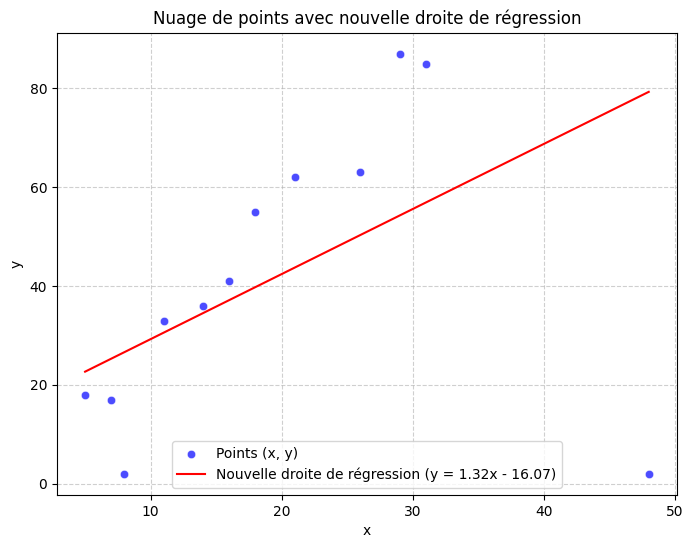

In [52]:
x_2=np.array([18, 7, 14, 31, 21, 5, 11, 16, 26, 29, 8, 48])
y_2=np.array([55, 17, 36, 85, 62, 18, 33, 41, 63, 87, 2, 2])

print(x)
print(y)

# Calcul des moyennes des x et y
x_mean_2 = np.mean(x_2)
y_mean_2 = np.mean(y_2)

# Calcul de la pente (a)
a_new = np.sum((x_2 - x_mean_2) * (y_2 - y_mean_2)) / np.sum((x - x_mean_2)**2)

# Calcul de l'ordonnée à l'origine (b)
b_new = y_mean_2 - a_new * x_mean_2

# Affichage des résultats de la nouvelle droite de régression
print(f"Nouvelle pente (a) : {a_new:.2f}")
print(f"Nouvelle ordonnée à l'origine (b) : {b_new:.2f}")
print(f"Equation de la droite : y = {a_new:.2f}x - {b_new:.2f}")

# Trace les points et la nouvelle droite de régression
x_line = np.linspace(min(x_2), max(x_2), 100)
y_line = a_new * x_line + b_new

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_2, y=y_2, color='blue', label='Points (x, y)', alpha=0.7)
sns.lineplot(x=x_line, y=y_line, label=f'Nouvelle droite de régression (y = {a_new:.2f}x - {b_new:.2f})', color='red')
plt.title('Nuage de points avec nouvelle droite de régression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Cette droite est recalculée en fonction des nouvelles moyennes de x et y, et des nouveaux coefficients de régression a et b.

B. Quelle est l’influence de ce point sur cette droite ?

En effet, la valeur [48, 2] est assez éloignée de la tendance générale (valeur "outlier") des données, a un effet significatif sur la pente de la droite. L'ajout de ce point très éloigné de la tendance générale modifie la pente et l'ordonnée à l'origine de la droite.
Avant d'ajouter ce point, l'équation de droite était de : y = 2.96x - 4.77. Avec l'ajout de [48, 2], la valeur de b a augmenté de manière signifiante (avec -16.07). Le coefficient directeur de y est passé de 2.96 à 1.32. La pente s'est donc légèrement écrasé horizontalement due à la valeur de y11 = 2.

Conclusion : lorsque nous ajoutons un point aussi éloigné des autres dans l'espace des données, cela a pour effet de modifier la dispersion des points autour de la droite de régression. En particulier, les points proches de la moyenne, c'est-à-dire ceux qui étaient initialement proches de la droite de régression, apparaissent désormais comme étant plus éloignés de celle-ci.

B. Calculer le $R^2$ avant l'ajout de [48, 2]

In [69]:
y_mean = np.mean(y)

# Calcul de la somme des carrés totaux (écart total)
ecart_total = np.sum((y - y_mean) ** 2)

# Calcul de la somme des carrés résiduels (écart expliqué)
ecart_explique = np.sum((y - y_pred) ** 2)

# On calcule R²
r_squared = 1 - (ecart_explique / ecart_total)

print(f"Le coefficient de détermination R² est : {r_squared:.4f}")

Le coefficient de détermination R² est : 0.9261


B. Calculer le $R^2$ après l'ajout de [48, 2]

In [73]:
# Calcul de la moyenne de y
y_mean_2 = np.mean(y_2)

y_pred_2 = a_new * x_2 + b_new

# Calcul de la somme des carrés totaux (écart total)
ecart_total_2 = np.sum((y_2 - y_mean_2) ** 2)

# Calcul de la somme des carrés résiduels (écart expliqué)
ecart_explique_2 = np.sum((y_2 - y_pred_2) ** 2)

# Calcul du R²
r_squared_2 = 1 - (ecart_explique_2 / ecart_total_2)

print(f"Le coefficient de détermination R² est : {r_squared_2:.4f}")

Le coefficient de détermination R² est : 0.0130


##   Analyse de complexité via la DFA

Le but de ce second exercice est d'évaluer la complexité de différents signaux par l'algorithme de la DFA




2. Coder l'algorithme de la DFA 

In [165]:
from scipy.stats import linregress

def DFA(signal, window_sizes):
    """
    Effectue l'analyse DFA sur un signal donné.

    Args:
        signal: Le signal d'entrée (un tableau NumPy 1D).
        window_sizes: Une liste de tailles de fenêtre à utiliser.

    Returns:
        Un tableau NumPy de fluctuations moyennes (F) pour chaque taille de fenêtre.
        Un tableau NumPy des tailles de fenêtre correspondantes.
    """
    X = np.cumsum(signal - np.mean(signal))  # Intégration du signal
    F = []
    for n in window_sizes:
        windows = [X[i:i + n] for i in range(0, len(X) - n, n)]
        F_n = []
        for window in windows:
            # Ajustement linéaire local (polynôme d'ordre 1)
            slope, intercept, _, _, _ = linregress(np.arange(len(window)), window)
            trend = intercept + slope * np.arange(len(window))
            F_n.append(np.sqrt(np.mean((window - trend) ** 2)))  # Fluctuation
        F.append(np.mean(F_n))  # Fluctuation moyenne
    return np.array(F), np.array(window_sizes)

Interprétation de l'exposant 𝛼 :
𝛼 = 0.5 : Comportement similaire à un bruit blanc (pas de corrélation).
𝛼 > 0.5 : Le signal a des corrélations à long terme, c'est-à-dire qu'il est plus "persistent".
𝛼 < 0.5 : Le signal présente une anti-corrélation, ou un comportement plus "contraignant".

Appliquer la DFA sur un bruit blanc gaussien  . Afficher les fluctuations puis la complexité $\alpha$

Alpha = 0.450412349569545


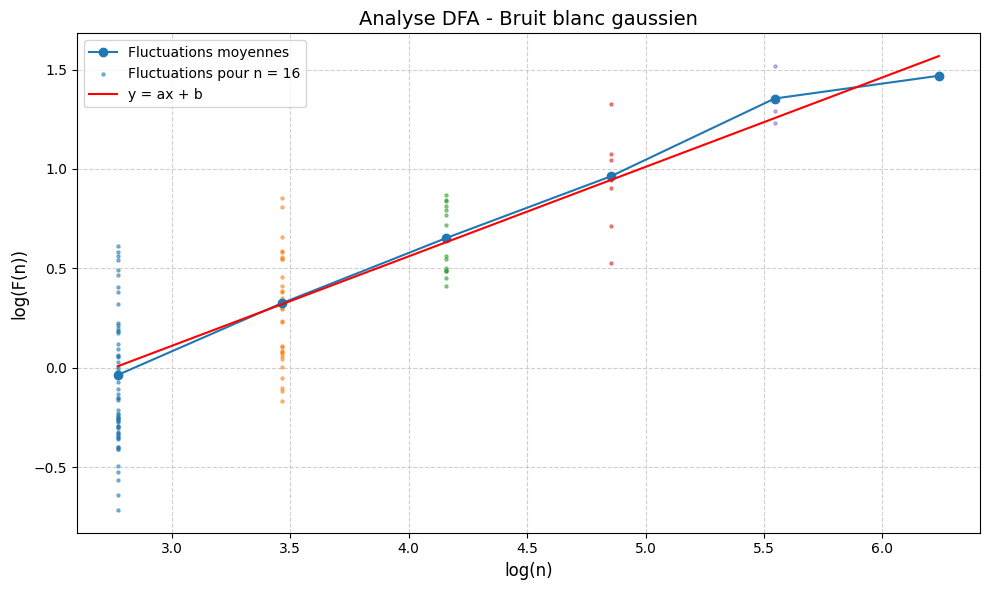

In [166]:
from scipy.stats import linregress

if __name__ == "__main__":
    # Générer un bruit blanc gaussien
    np.random.seed(42)
    N = 1000  # Nombre de points
    white_noise = np.random.randn(N)  # Bruit blanc gaussien (moyenne nulle, écart-type 1)
    
    # Définir les tailles de fenêtre pour l'analyse
    window_sizes = np.power(2, np.arange(4, 10))
    
    # Appliquer l'algorithme DFA
    F, n = DFA(white_noise, window_sizes)
    
    # Affichage des résultats de l'analyse DFA
    plt.figure(figsize=(10, 6))

    # Tracer les fluctuations moyennes
    plt.plot(np.log(n), np.log(F), 'o-', label="Fluctuations moyennes")
    
    # Ajouter les fluctuations individuelles pour chaque taille de fenêtre
    for i, n_i in enumerate(window_sizes):
        X = np.cumsum(white_noise - np.mean(white_noise))
        windows = [X[j:j + n_i] for j in range(0, len(X) - n_i, n_i)]
        F_n = []
        
        for window in windows:
            slope, intercept, _, _, _ = linregress(np.arange(len(window)), window)
            trend = intercept + slope * np.arange(len(window))
            F_n.append(np.sqrt(np.mean((window - trend) ** 2)))
        
        # Tracer les fluctuations individuelles pour chaque taille de fenêtre
        plt.scatter([np.log(n_i)] * len(F_n), np.log(F_n), s=5, alpha=0.5, label=f"Fluctuations pour n = {n_i}" if i == 0 else "")

    # Calculer la pente (alpha) et l'ordonnée à l'origine de la droite de régression
    slope, intercept, _, _, _ = linregress(np.log(n), np.log(F))
    print("Alpha =", slope)
    
    # Générer la droite de régression y = ax + b
    x_line = np.log(n)  # Valeurs de x pour la droite
    y_line = slope * x_line + intercept  # Valeurs de y pour la droite
    
    # Affichage de la droite sur le graphique
    plt.plot(x_line, y_line, 'r-', label="y = ax + b")
    
    # Configuration du graphique
    plt.xlabel("log(n)", fontsize=12)
    plt.ylabel("log(F(n))", fontsize=12)
    plt.title("Analyse DFA - Bruit blanc gaussien", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Affichage
    plt.tight_layout()
    plt.show()
    

Réaliser une étude de la complexité sur des signaux physiologiques Iris. Analyser les résultats

In [122]:
import pandas as pd

iris_data = pd.read_csv('Iris.csv')

In [123]:
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [139]:
print(iris_data.info()) # Affiche les infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [125]:
# Afficher des statistiques descriptives (pour examiner les valeurs numériques)

print(iris_data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


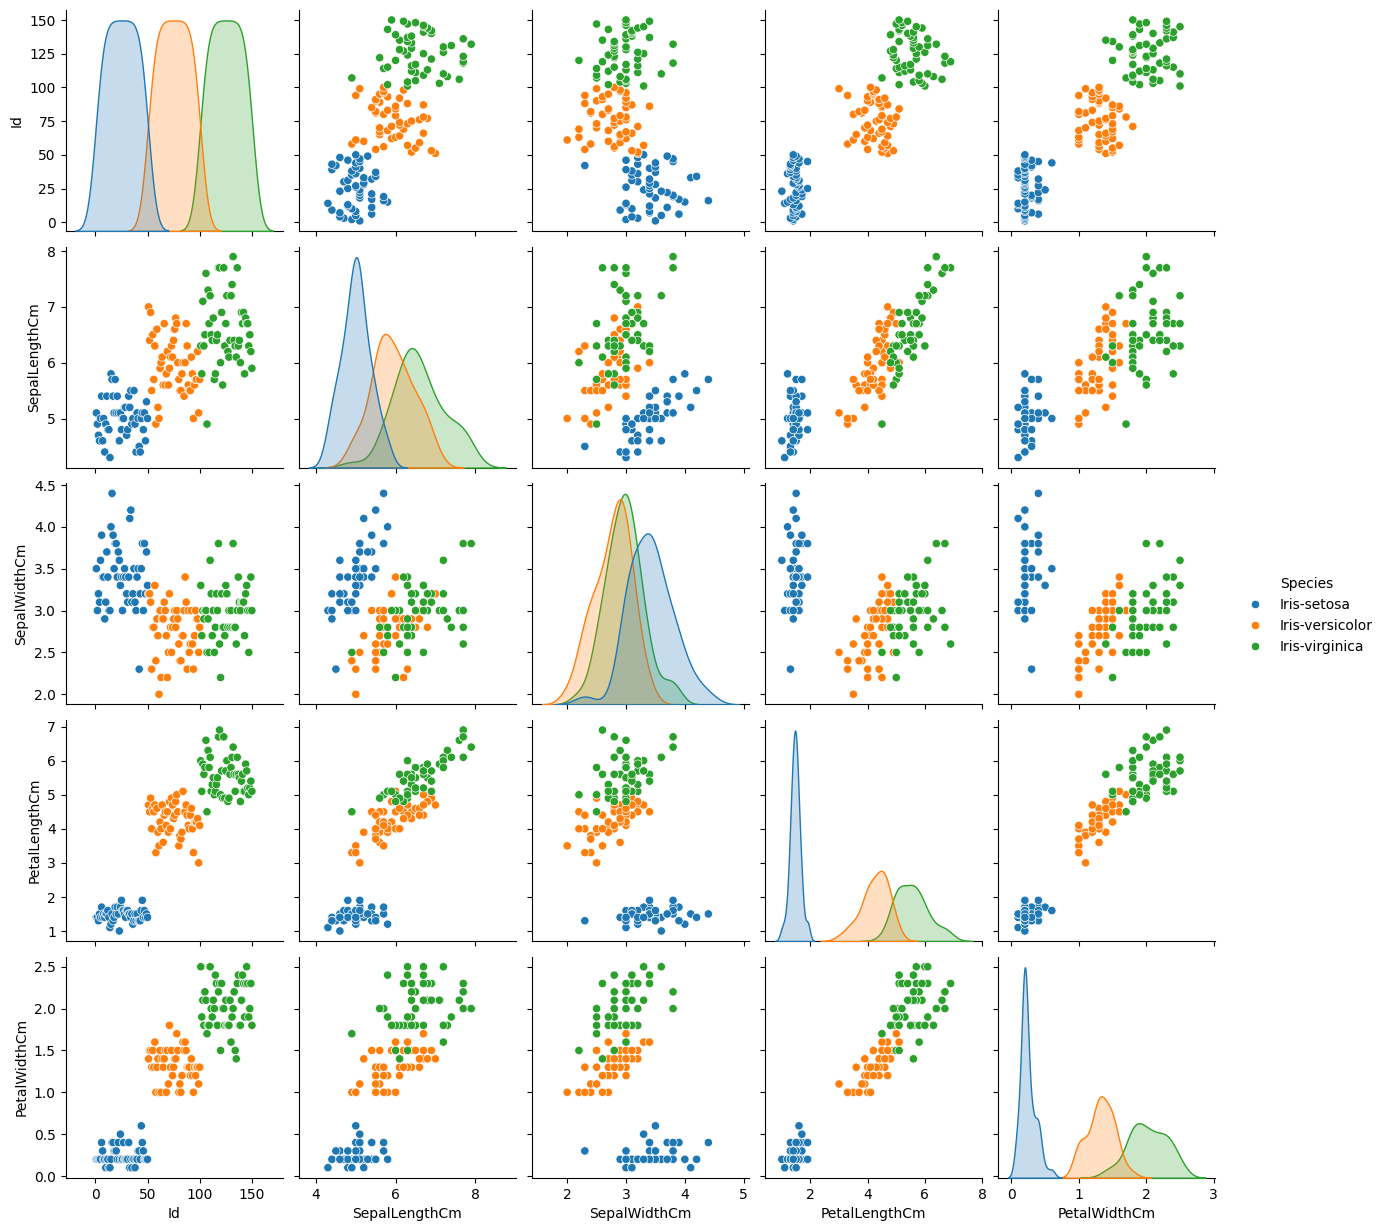

In [ ]:
# Afficher les "Species" avant ACP

import seaborn as sns

iris_df = iris_data.copy()
sns.pairplot(iris_df, hue="Species", diag_kind="auto")
plt.show()

On constate déjà que "Petal Width" et "Petal Length" sont très corrélés. Et que pour tous les critères, IRIS-SETOSA ne se mélange pas avec les autres.

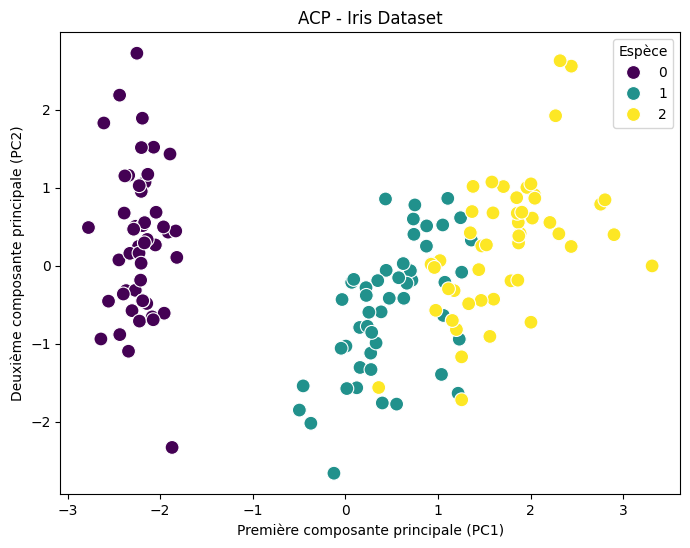

array([0.72770452, 0.23030523])

In [134]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

iris_df = pd.DataFrame(iris_data)

# Préparation des données
iris_df = iris_df.drop(columns=["Id"])  # Supprimer la colonne Id
species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
iris_df["Species"] = iris_df["Species"].map(species_mapping)  # Conversion en numérique

# Sépare les caractéristiques et les cibles
features = iris_df.drop(columns=["Species"])
targets = iris_df["Species"]

# Standardisation des données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Application de l'ACP
pca = PCA(n_components=2)  # Réduire à 2 composantes principales pour visualisation
principal_components = pca.fit_transform(features_scaled)

# Ajoute les composantes principales au DataFrame
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
final_df = pd.concat([principal_df, targets.reset_index(drop=True)], axis=1)

# Visualisation des deux premières composantes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x="PC1", y="PC2", hue="Species", palette="viridis", s=100)
plt.title("ACP - Iris Dataset")
plt.xlabel("Première composante principale (PC1)")
plt.ylabel("Deuxième composante principale (PC2)")
plt.legend(title="Espèce")
plt.show()

# Retourne les résultats préliminaires de l'ACP
pca.explained_variance_ratio_


En réduisant sur 2 composantes principales, on confirme nos hypothèse; c'est à dire que l'espèce "Sétosa" est très indépendantes des autres.

Alpha = 0.7442982375453863


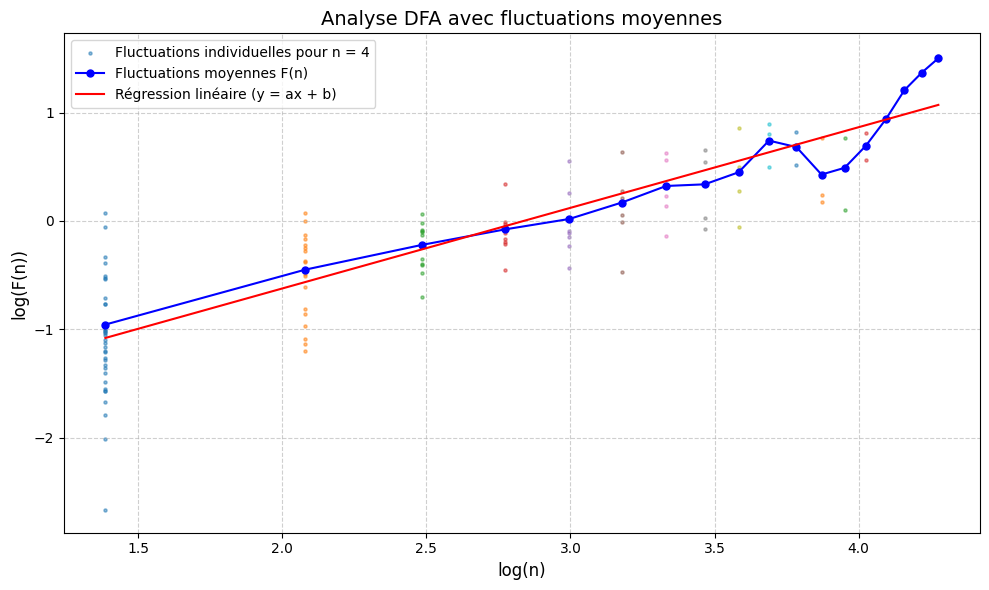

In [ ]:
# Signal de la seconde composante principale
num_compo = 1
signal = principal_components[:, num_compo]  # Première composante

# Application de DFA
window_sizes = np.arange(4, len(signal) // 2, 4)  # Tailles de fenêtre entre 4 et un quart de la longueur du signal
F_2, sizes = DFA(signal, window_sizes)


# Initialisation du graphique
plt.figure(figsize=(10, 6))

# Ajoute les fluctuations individuelles pour chaque taille de fenêtre
for i, n_i in enumerate(window_sizes):
    # Calcul du signal cumulé
    X_2 = np.cumsum(signal - np.mean(signal))
    
    # Découpe en fenêtres valides
    windows = [X_2[j:j + n_i] for j in range(0, len(X_2) - n_i + 1, n_i)]
    F_n = []
    
    # Calcul des fluctuations pour chaque fenêtre
    for window in windows:
        # Vérification : utiliser uniquement des fenêtres de taille n_i
        if len(window) == n_i:
            slope, intercept, _, _, _ = linregress(np.arange(len(window)), window)
            trend = intercept + slope * np.arange(len(window))
            F_n.append(np.sqrt(np.mean((window - trend) ** 2)))
    
    # Trace les fluctuations individuelles pour chaque taille de fenêtre
    plt.scatter([np.log(n_i)] * len(F_n), np.log(F_n), s=5, alpha=0.5, label=f"Fluctuations individuelles pour n = {n_i}" if i == 0 else "")

# Trace les fluctuations moyennes (F(n)) pour chaque taille de fenêtre
# Old syntax -->plt.scatter(np.log(sizes), np.log(F_2), color='red', s=50, label="Fluctuations moyennes F(n)")
plt.plot(np.log(sizes), np.log(F_2), color='blue', marker='o', markersize=5, label="Fluctuations moyennes F(n)")


# Calculer la pente (alpha) et l'ordonnée à l'origine de la droite de régression
log_sizes = np.log(sizes)
log_F = np.log(F_2)
slope, intercept, _, _, _ = linregress(log_sizes, log_F)
print("Alpha =", slope)

# Génére la droite de régression y = ax + b
x_line = np.linspace(min(log_sizes), max(log_sizes), 100)  # Valeurs de x pour la droite
y_line = slope * x_line + intercept  # Valeurs de y pour la droite

# Affichage de la droite sur le graphique
plt.plot(x_line, y_line, 'r-', label="Régression linéaire (y = ax + b)")

# Configuration du graphique
plt.xlabel("log(n)", fontsize=12)
plt.ylabel("log(F(n))", fontsize=12)
plt.title("Analyse DFA avec fluctuations moyennes", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Affichage
plt.tight_layout()
plt.show()

Alpha = 1.2292940329721265


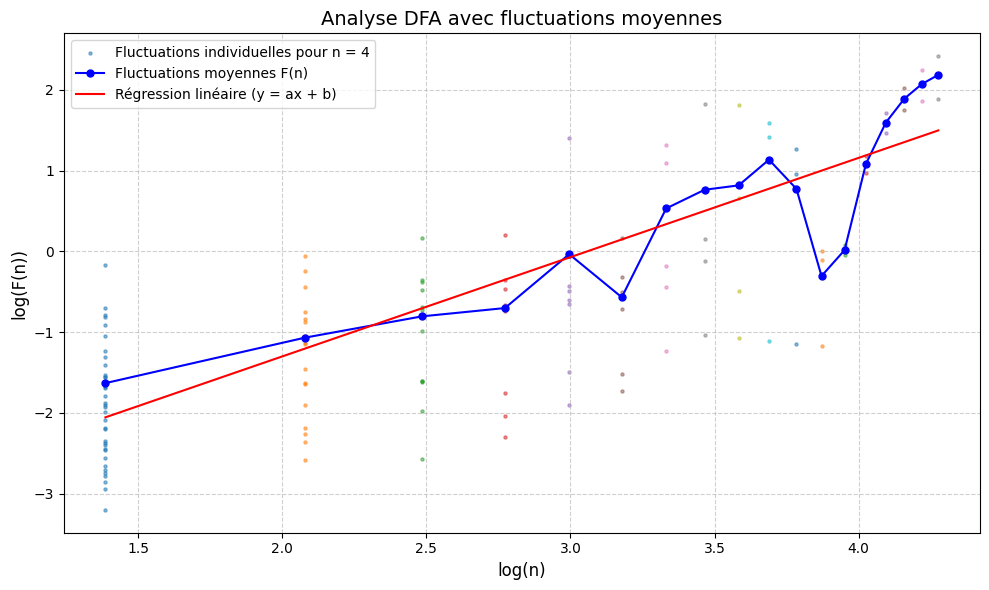

In [167]:
# Signal de la première composante principale
num_compo = 0
signal = principal_components[:, num_compo]  # Première composante

# Application de DFA
window_sizes = np.arange(4, len(signal) // 2, 4)  # Tailles de fenêtre entre 4 et un quart de la longueur du signal
F_2, sizes = DFA(signal, window_sizes)


# Initialisation du graphique
plt.figure(figsize=(10, 6))

# Ajoute les fluctuations individuelles pour chaque taille de fenêtre
for i, n_i in enumerate(window_sizes):
    # Calcul du signal cumulé
    X_2 = np.cumsum(signal - np.mean(signal))
    
    # Découpe en fenêtres valides
    windows = [X_2[j:j + n_i] for j in range(0, len(X_2) - n_i + 1, n_i)]
    F_n = []
    
    # Calcul des fluctuations pour chaque fenêtre
    for window in windows:
        # Vérification : utiliser uniquement des fenêtres de taille n_i
        if len(window) == n_i:
            slope, intercept, _, _, _ = linregress(np.arange(len(window)), window)
            trend = intercept + slope * np.arange(len(window))
            F_n.append(np.sqrt(np.mean((window - trend) ** 2)))
    
    # Tracer les fluctuations individuelles pour chaque taille de fenêtre
    plt.scatter([np.log(n_i)] * len(F_n), np.log(F_n), s=5, alpha=0.5, label=f"Fluctuations individuelles pour n = {n_i}" if i == 0 else "")

# Trace les fluctuations moyennes (F(n)) pour chaque taille de fenêtre
# Old syntax --> plt.scatter(np.log(sizes), np.log(F_2), color='red', s=50, label="Fluctuations moyennes F(n)")
plt.plot(np.log(sizes), np.log(F_2), color='blue', marker='o', markersize=5, label="Fluctuations moyennes F(n)")


# Calcule la pente (alpha) et l'ordonnée à l'origine de la droite de régression
log_sizes = np.log(sizes)
log_F = np.log(F_2)
slope, intercept, _, _, _ = linregress(log_sizes, log_F)
print("Alpha =", slope)

# Génére la droite de régression y = ax + b
x_line = np.linspace(min(log_sizes), max(log_sizes), 100)  # Valeurs de x pour la droite
y_line = slope * x_line + intercept  # Valeurs de y pour la droite

# Affichage de la droite sur le graphique
plt.plot(x_line, y_line, 'r-', label="Régression linéaire (y = ax + b)")

# Configuration du graphique
plt.xlabel("log(n)", fontsize=12)
plt.ylabel("log(F(n))", fontsize=12)
plt.title("Analyse DFA avec fluctuations moyennes", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Affichage
plt.tight_layout()
plt.show()

La première composante principale (PC1) est choisie comme signal d'entrée pour l'analyse DFA.

DFA :

Le signal est intégré.
Pour chaque taille de fenêtre, un ajustement linéaire local est effectué.
Les fluctuations moyennes sont calculées pour chaque fenêtre.